In [1]:
import urllib.request
from bs4 import BeautifulSoup as bs
import pandas as pd

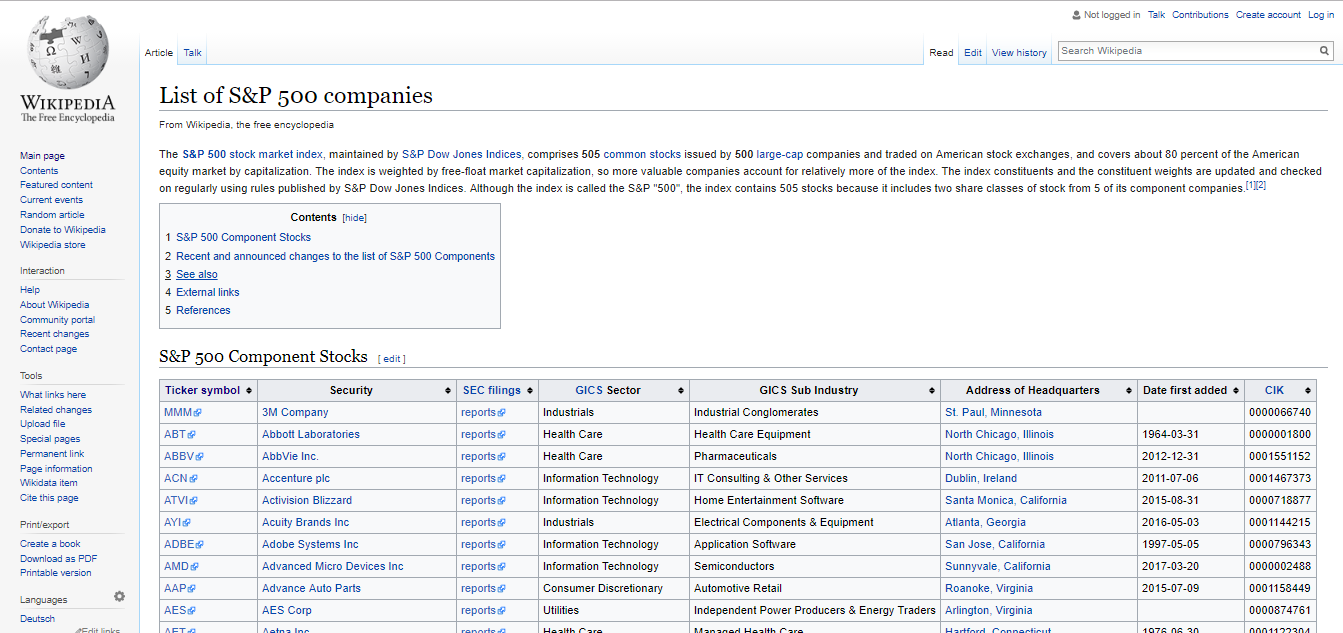

In [2]:
from IPython.display import Image
Image(filename='S&P 500a.png')

In [3]:
website ='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [4]:
webpage = urllib.request.urlopen(website)
soup=bs(webpage.read(), "lxml")
soup #view page

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of S&amp;P 500 companies - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_S\u0026P_500_companies","wgTitle":"List of S\u0026P 500 companies","wgCurRevisionId":786648328,"wgRevisionId":786648328,"wgArticleId":2676045,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","S\u0026P Dow Jones Indices","Lists of companies","Standard \u0026 Poor's"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateF

In [5]:
table = soup.find('table',{'class':'wikitable'})

In [6]:
table

<table class="wikitable sortable">
<tr>
<th><a href="/wiki/Ticker_symbol" title="Ticker symbol">Ticker symbol</a></th>
<th>Security</th>
<th><a href="/wiki/SEC_filing" title="SEC filing">SEC filings</a></th>
<th><a href="/wiki/Global_Industry_Classification_Standard" title="Global Industry Classification Standard">GICS</a> Sector</th>
<th>GICS Sub Industry</th>
<th>Address of Headquarters</th>
<th>Date first added</th>
<th><a href="/wiki/Central_Index_Key" title="Central Index Key">CIK</a></th>
</tr>
<tr>
<td><a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a></td>
<td><a href="/wiki/3M" title="3M">3M Company</a></td>
<td><a class="external text" href="http://www.sec.gov/cgi-bin/browse-edgar?CIK=MMM&amp;action=getcompany" rel="nofollow">reports</a></td>
<td>Industrials</td>
<td>Industrial Conglomerates</td>
<td><a class="mw-redirect" href="/wiki/St._Paul,_Minnesota" title="St. Paul, Minnesota">St. Paul, Minnesota</a></td>
<td></td>
<td>0000066740<

In [7]:
TandI =dict() #Dictionary Company Ticker with Industry Sector

for row in table.findAll('tr'): # table row
    col=row.findAll('td') # table data
    if len(col) >0: # not empty
        ticker = str(col[0].string.strip()) #strip() removes all whitespace, tabs, newlines and carriage returns.
        industry = str(col[4].string.strip())
        TandI[ticker] = industry

In [8]:
TandI

{'A': 'Health Care Equipment',
 'AAL': 'Airlines',
 'AAP': 'Automotive Retail',
 'AAPL': 'Technology Hardware, Storage & Peripherals',
 'ABBV': 'Pharmaceuticals',
 'ABC': 'Health Care Distributors',
 'ABT': 'Health Care Equipment',
 'ACN': 'IT Consulting & Other Services',
 'ADBE': 'Application Software',
 'ADI': 'Semiconductors',
 'ADM': 'Agricultural Products',
 'ADP': 'Internet Software & Services',
 'ADS': 'Data Processing & Outsourced Services',
 'ADSK': 'Application Software',
 'AEE': 'Multi-Utilities',
 'AEP': 'Electric Utilities',
 'AES': 'Independent Power Producers & Energy Traders',
 'AET': 'Managed Health Care',
 'AFL': 'Life & Health Insurance',
 'AGN': 'Pharmaceuticals',
 'AIG': 'Property & Casualty Insurance',
 'AIV': 'Residential REITs',
 'AIZ': 'Multi-line Insurance',
 'AJG': 'Insurance Brokers',
 'AKAM': 'Internet Software & Services',
 'ALB': 'Specialty Chemicals',
 'ALGN': 'Health Care Supplies',
 'ALK': 'Airlines',
 'ALL': 'Property & Casualty Insurance',
 'ALLE': 

In [9]:
ticker = pd.Series(TandI)
ticker.to_csv('SP500 ticker & Industry.csv')